# Linear regression
## Apply a multiple linear regression on the given dataset

## Variable list
- TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities 
- medIncome: Median income per county
- binnedInc: Median income per capita binned by decile
- popEst2015: Population of county
- povertyPercent: Percent of populace in poverty
- studyPerCap: Per capita number of cancer-related clinical trials per county
- MedianAge: Median age of county residents 
- MedianAgeMale: Median age of male county residents
- MedianAgeFemale: Median age of female county residents
- Geography: County name
- AvgHouseholdSize: Mean household size of county
- PercentMarried: Percent of county residents who are married
- PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school
- PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma
- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 
- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree
- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma
- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree
- PctEmployed16_Over: Percent of county residents ages 16 and over employed
- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed
- PctPrivateCoverage: Percent of county residents with private health coverage
- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)
- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage
- PctPublicCoverage: Percent of county residents with government-provided health coverage
- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone
- PctWhite: Percent of county residents who identify as White
- PctBlack: Percent of county residents who identify as Black
- PctAsian: Percent of county residents who identify as Asian
- PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian
- PctMarriedHouseholds: Percent of married households
- BirthRate: Number of live births relative to number of women in county

In this assignment, the variable, “Geography” is omitted in the modeling and the variable “binnedInc” is converted to the mid values of ranges. 

In [1]:
# packages and data import
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import t, f, chi2, skew, kurtosis
%matplotlib inline
data=pd.read_csv('https://drive.google.com/uc?export=download&id=17Dq80wtL08OGEsmwjvMXLmLAm_lRgFUl')

In [2]:
data.shape

(3047, 31)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TARGET_deathRate         3047 non-null   float64
 1   medIncome                3047 non-null   int64  
 2   popEst2015               3047 non-null   int64  
 3   povertyPercent           3047 non-null   float64
 4   studyPerCap              3047 non-null   float64
 5   binnedInc                3047 non-null   object 
 6   MedianAge                3047 non-null   float64
 7   MedianAgeMale            3047 non-null   float64
 8   MedianAgeFemale          3047 non-null   float64
 9   Geography                3047 non-null   object 
 10  AvgHouseholdSize         3047 non-null   float64
 11  PercentMarried           3047 non-null   float64
 12  PctNoHS18_24             3047 non-null   float64
 13  PctHS18_24               3047 non-null   float64
 14  PctSomeCol18_24         

In [4]:
# In this assignment, the variable, “Geography” is omitted in the modeling and the variable “binnedInc” is converted to the mid values of ranges.

data = data.drop('Geography', axis='columns')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TARGET_deathRate         3047 non-null   float64
 1   medIncome                3047 non-null   int64  
 2   popEst2015               3047 non-null   int64  
 3   povertyPercent           3047 non-null   float64
 4   studyPerCap              3047 non-null   float64
 5   binnedInc                3047 non-null   object 
 6   MedianAge                3047 non-null   float64
 7   MedianAgeMale            3047 non-null   float64
 8   MedianAgeFemale          3047 non-null   float64
 9   AvgHouseholdSize         3047 non-null   float64
 10  PercentMarried           3047 non-null   float64
 11  PctNoHS18_24             3047 non-null   float64
 12  PctHS18_24               3047 non-null   float64
 13  PctSomeCol18_24          762 non-null    float64
 14  PctBachDeg18_24         

In [5]:
def get_mid_value(range_str):
    # Split the range string into its lower and upper limits
    lower, upper = map(float, range_str[1:-1].split(","))
    # Calculate the mid value
    mid = (lower + upper) / 2
    return mid

ranges = data["binnedInc"].unique()
mid_values = {range_str: get_mid_value(range_str) for range_str in ranges}

data["binnedInc"] = data["binnedInc"].replace(mid_values)

In [6]:
print(data['binnedInc'])

0       93564.75
1       49534.00
2       49534.00
3       43962.70
4       49534.00
          ...   
3042    46611.30
3043    49534.00
3044    52796.00
3045    49534.00
3046    41543.55
Name: binnedInc, Length: 3047, dtype: float64


## Part 1: Preprocessing

1-(1) Some input variables contain missing values. If the proportion of missing values in a variable exceeds 70%, the variable should be excluded from the dataset. Is there any variable to be excluded? 

In [7]:
missing_proportions = data.isna().mean()
print(missing_proportions)
excluded_vars = missing_proportions[missing_proportions > 0.7].index.tolist()
print(excluded_vars)

TARGET_deathRate           0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
binnedInc                  0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.749918
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.049885
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.199869
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0.000000
PctWhite                   0.000000
PctBlack                   0.000000
PctAsian                   0.000000
PctOtherRace               0

1-(2) After excluding some variables if necessary, some rows containing missing values should be deleted from the dataset. After removing any sample with missing values, how many samples remain in the dataset?

In [8]:
data = data.drop(excluded_vars, axis = 1)
data = data.dropna()

num_samples = len(data)
print(num_samples)

2332


### For all subsequent questions, the preprocesed data according to Questions 1-(1) and (2) are used. 

1-(3) Find the top 10 input variables that show the high linear correlation with the target based on the correlation coefficients.  

In [9]:
# Calculate the correlation matrix between input variables and the target variable
corr_matrix = np.abs(data.corr(method='pearson'))

# Sort the correlation coefficients in descending order and extract the top 10 input variables
top_10_vars = corr_matrix['TARGET_deathRate'].sort_values(ascending=False)[1:11]

# Print the top 10 input variables with the highest correlation coefficients
print(top_10_vars)

PctBachDeg25_Over         0.476887
PctPublicCoverageAlone    0.431260
medIncome                 0.408499
povertyPercent            0.406637
PctEmployed16_Over        0.401630
PctHS25_Over              0.398854
PctPublicCoverage         0.390347
binnedInc                 0.372913
PctPrivateCoverage        0.372887
PctUnemployed16_Over      0.367271
Name: TARGET_deathRate, dtype: float64


1-(4) Draw pairwise scatter plots – one scatter plot illustrates the pairwise relationship between one of input variables selected in Question 1-(3) and output target. Paste figures here. 

Text(0, 0.5, 'TARGET_deathRate')

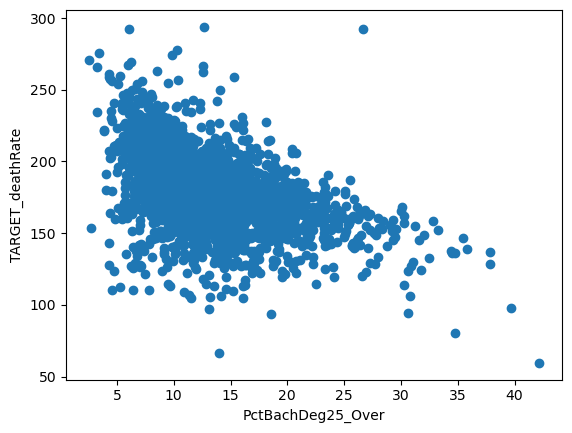

In [10]:
plt.scatter(data["PctBachDeg25_Over"], data["TARGET_deathRate"])

plt.xlabel("PctBachDeg25_Over")
plt.ylabel("TARGET_deathRate")

1-(5) Calculate variance inflation factor (VIF) for each explanatory variable and summary the values using a table. 

In [11]:
# Extract the input variables
X = data.iloc[:, :-1]

# Compute the correlation matrix
corr = X.corr()

# Calculate the diagonal matrix
D = np.diagflat(np.sqrt(np.diag(corr)))

# Calculate the inverse of the diagonal matrix
D_inv = np.linalg.inv(D)

# Calculate the VIF for each input variable
VIF = pd.DataFrame()
VIF["Variable"] = X.columns
VIF["VIF"] = np.diag(np.linalg.inv(corr)).round(2)

# Print the VIF summary table
VIF

,Variable,VIF
0,TARGET_deathRate,1.65
1,medIncome,13.97
2,popEst2015,1.42
3,povertyPercent,8.86
4,studyPerCap,1.04
5,binnedInc,7.41
6,MedianAge,1.03
7,MedianAgeMale,9.18
8,MedianAgeFemale,10.32
9,AvgHouseholdSize,1.34


1-(6) According to the results of Question 1-(5), describe your opinion on how to select which variables should be excluded from training a linear regression model. In this assignment, if the VIF is 10 or greater, the multicollinearity is considered to be severe. 

In [12]:
"""
When VIF values are high (10 or greater), 
it indicates that there is strong correlation between the input variables, 
which means that there is multicollinearity in the data. 
Multicollinearity can cause problems in linear regression models, 
Therefore, it is often advisable to exclude input variables with high VIF values from the model.
"""

high_VIF = VIF[VIF["VIF"]>10]
high_VIF

,Variable,VIF
1,medIncome,13.97
8,MedianAgeFemale,10.32
10,PercentMarried,11.47
18,PctPrivateCoverage,61.91
19,PctPrivateCoverageAlone,80.94
20,PctEmpPrivCoverage,11.17
21,PctPublicCoverage,48.74
22,PctPublicCoverageAlone,39.14


## Part 2: Modeling

2-(1) Train a linear regression model (M1) using all variables and fill the following table (You should add more rows to include all variables in the following table). 

In [13]:
data1 = pd.read_csv('https://drive.google.com/uc?export=download&id=17Dq80wtL08OGEsmwjvMXLmLAm_lRgFUl')
data1 = data1.drop('Geography', axis='columns')
ranges = data1["binnedInc"].unique()
mid_values = {range_str: get_mid_value(range_str) for range_str in ranges}

data1["binnedInc"] = data1["binnedInc"].replace(mid_values)

data1 = data1.drop(excluded_vars, axis = 1)
data1 = data1.dropna()

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 1 to 3046
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TARGET_deathRate         2332 non-null   float64
 1   medIncome                2332 non-null   int64  
 2   popEst2015               2332 non-null   int64  
 3   povertyPercent           2332 non-null   float64
 4   studyPerCap              2332 non-null   float64
 5   binnedInc                2332 non-null   float64
 6   MedianAge                2332 non-null   float64
 7   MedianAgeMale            2332 non-null   float64
 8   MedianAgeFemale          2332 non-null   float64
 9   AvgHouseholdSize         2332 non-null   float64
 10  PercentMarried           2332 non-null   float64
 11  PctNoHS18_24             2332 non-null   float64
 12  PctHS18_24               2332 non-null   float64
 13  PctBachDeg18_24          2332 non-null   float64
 14  PctHS25_Over            

In [14]:
# Select input variables and target variable
X1 = data1.drop(columns=['TARGET_deathRate'])
y1 = data1['TARGET_deathRate']

# Train a linear regression model
M1 = LinearRegression().fit(X1, y1)

# Extract the coefficients, standard errors, t-statistics, and p-values
coef = M1.coef_
se = np.sqrt(np.diag(np.linalg.inv(np.dot(X1.T, X1)) * (np.sum((y1 - M1.predict(X1)) ** 2) / (len(y1) - X1.shape[1] - 1))))
t_stat = coef / se
p_val = 2 * t.cdf(-np.abs(t_stat), df=len(y1)-X1.shape[1]-1)

# Create a summary table
results = pd.DataFrame({'Coefficients': coef, 'SE': se, 't': t_stat, 'P-value': p_val}, index=X1.columns)
results

,Coefficients,SE,t,P-value
medIncome,3.081899e-04,0.000136,2.270577,2.326461e-02
popEst2015,-7.369303e-07,0.000002,-0.479117,6.319012e-01
povertyPercent,9.846676e-02,0.163655,0.601672,5.474518e-01
studyPerCap,2.928871e-04,0.000787,0.372134,7.098270e-01
binnedInc,-1.934300e-05,0.000071,-0.271434,7.860813e-01
MedianAge,8.174312e-04,0.010242,0.079809,9.363963e-01
MedianAgeMale,-5.387478e-01,0.259927,-2.072690,3.831217e-02
MedianAgeFemale,-4.382257e-01,0.269553,-1.625752,1.041392e-01
AvgHouseholdSize,-1.389791e-01,1.162679,-0.119533,9.048632e-01
PercentMarried,1.857746e+00,0.213580,8.698135,6.297828e-18


2-(2) Train a linear regression model (M2) using the selected variables in Question 1-(1) and fill the following table (You should add more rows to include the selected variables in the following table). 

In [15]:
# Select input variables and target variable
X2 = data1.drop(columns=['TARGET_deathRate' , 'popEst2015', 'studyPerCap',
                        'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
                        'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
                        'PctHS18_24', 'PctBachDeg18_24', 'PctPrivateCoverageAlone',
                        'PctEmpPrivCoverage', 'PctWhite', 'PctBlack', 'PctAsian',
                        'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'])
y2 = data1['TARGET_deathRate']

# Train a linear regression model
M2 = LinearRegression().fit(X2, y2)

# Extract the coefficients, standard errors, t-statistics, and p-values
coef = M2.coef_
se = np.sqrt(np.diag(np.linalg.inv(np.dot(X2.T, X2)) * (np.sum((y2 - M2.predict(X2)) ** 2) / (len(y2) - X2.shape[1] - 1))))
t_stat = coef / se
p_val = 2 * t.cdf(-np.abs(t_stat), df=len(y2)-X2.shape[1]-1)

# Create a summary table
results = pd.DataFrame({'Coefficients': coef, 'SE': se, 't': t_stat, 'P-value': p_val}, index=X2.columns)
results

,Coefficients,SE,t,P-value
medIncome,-0.000060,0.000126,-0.477958,6.327249e-01
povertyPercent,0.706724,0.145042,4.872560,1.175962e-06
binnedInc,0.000033,0.000075,0.438209,6.612759e-01
PctHS25_Over,0.976809,0.110018,8.878639,1.324237e-18
PctBachDeg25_Over,-0.864551,0.185302,-4.665626,3.251770e-06
PctEmployed16_Over,-0.101252,0.096376,-1.050589,2.935569e-01
PctUnemployed16_Over,1.350560,0.203670,6.631110,4.130715e-11
PctPrivateCoverage,0.615677,0.107591,5.722396,1.185827e-08
PctPublicCoverage,-0.669323,0.157516,-4.249248,2.229611e-05
PctPublicCoverageAlone,1.633021,0.278764,5.858069,5.348202e-09


2-(3) Train a linear regression model (M3) using the selected variables in Question 1-(4) and fill the following table (You can add more rows to include the selected variables in the following table). 

In [16]:
# Select input variables and target variable
X3 = data1.drop(columns=['TARGET_deathRate','medIncome', 'MedianAgeFemale',
                        'PercentMarried', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
                        'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone'])
y3 = data1['TARGET_deathRate']

# Train a linear regression model
M3 = LinearRegression().fit(X3, y3)

# Extract the coefficients, standard errors, t-statistics, and p-values
coef = M3.coef_
se = np.sqrt(np.diag(np.linalg.inv(np.dot(X3.T, X3)) * (np.sum((y3 - M3.predict(X3)) ** 2) / (len(y3) - X3.shape[1] - 1))))
t_stat = coef / se
p_val = 2 * t.cdf(-np.abs(t_stat), df=len(y3)-X3.shape[1]-1)

# Create a summary table
results = pd.DataFrame({'Coefficients': coef, 'SE': se, 't': t_stat, 'P-value': p_val}, index=X3.columns)
results

,Coefficients,SE,t,P-value
popEst2015,5.649343e-08,0.000002,0.036300,9.710466e-01
povertyPercent,2.708001e-01,0.128470,2.107879,3.514888e-02
studyPerCap,2.634953e-04,0.000801,0.328761,7.423658e-01
binnedInc,1.113404e-04,0.000049,2.266549,2.350989e-02
MedianAge,-2.447512e-03,0.010464,-0.233897,8.150860e-01
MedianAgeMale,-5.489511e-01,0.108835,-5.043871,4.916876e-07
AvgHouseholdSize,-1.129897e+00,1.157268,-0.976349,3.289936e-01
PctNoHS18_24,-2.865063e-01,0.066908,-4.282067,1.927331e-05
PctHS18_24,2.586695e-01,0.060653,4.264750,2.081780e-05
PctBachDeg18_24,-3.464012e-02,0.137226,-0.252432,8.007299e-01


## Part 3: Assessment

3-(1) Apply the F-test on M1, M2, and M3 and explain the results. In addition, fill the following tables. 

In [17]:
# Calculate the predicted values and residuals
y1_pred = M1.predict(X1)
residuals_1 = y1 - y1_pred

# Calculate the total sum of squares (SST)
sst = np.sum((y1 - np.mean(y1)) ** 2)

# Calculate the residual sum of squares (SSE)
sse = np.sum(residuals_1 ** 2)

# Calculate the regression sum of squares (SSR)
ssr = sst - sse

# Calculate the degrees of freedom
n = X1.shape[0]
k = X1.shape[1]
df_total = n - 1
df_regression = k
df_residual = df_total - df_regression

# Calculate the mean squared error (MSE)
mse = sse / df_residual

# Calculate the mean squared regression (MSR)
msr = ssr / df_regression

# Calculate the F-value and p-value
f_value = msr / mse
p_value = 1 - f.cdf(f_value, df_regression, df_residual)

# Calculate R^2 and Adjusted R^2 of M1
r2_m1 = 1 - sse/sst
adj_r2_m1 = 1 - (sse/(n-k-1)) / (sst/(n-1))


# Print the results
print('SST:', sst)
print('SSR:', ssr)
print('SSE:', sse)
print('Total degrees of freedom:', df_total)
print('Regression degrees of freedom:', df_regression)
print('Residual degrees of freedom:', df_residual)
print('MSE:', mse)
print('MSR:', msr)
print('F-value:', f_value)
print('p-value:', p_value)
print('r2_m1:',r2_m1)
print('adj_r2_m1:',adj_r2_m1)

SST: 1760596.4699614064
SSR: 711047.0467409284
SSE: 1049549.423220478
Total degrees of freedom: 2331
Regression degrees of freedom: 28
Residual degrees of freedom: 2303
MSE: 455.731403916838
MSR: 25394.537383604587
F-value: 55.722597050254166
p-value: 1.1102230246251565e-16
r2_m1: 0.40386713189111134
adj_r2_m1: 0.3966193158654714


In [18]:
# Calculate the predicted values and residuals
y2_pred = M2.predict(X2)
residuals_2 = y2 - y2_pred

# Calculate the total sum of squares (SST)
sst = np.sum((y2 - np.mean(y2)) ** 2)

# Calculate the residual sum of squares (SSE)
sse = np.sum(residuals_2 ** 2)

# Calculate the regression sum of squares (SSR)
ssr = sst - sse

# Calculate the degrees of freedom
n = X2.shape[0]
k = X2.shape[1]
df_total = n - 1
df_regression = k
df_residual = df_total - df_regression

# Calculate the mean squared error (MSE)
mse = sse / df_residual

# Calculate the mean squared regression (MSR)
msr = ssr / df_regression

# Calculate the F-value and p-value
f_value = msr / mse
p_value = 1 - f.cdf(f_value, df_regression, df_residual)

# Calculate R^2 and Adjusted R^2 of M1
r2_m2 = 1 - sse/sst
adj_r2_m2 = 1 - (sse/(n-k-1)) / (sst/(n-1))

# Print the results
print('SST:', sst)
print('SSR:', ssr)
print('SSE:', sse)
print('Total degrees of freedom:', df_total)
print('Regression degrees of freedom:', df_regression)
print('Residual degrees of freedom:', df_residual)
print('MSE:', mse)
print('MSR:', msr)
print('F-value:', f_value)
print('p-value:', p_value)
print('r2_m2:',r2_m2)
print('adj_r2_m2:',adj_r2_m2)

SST: 1760596.4699614064
SSR: 560295.1992128154
SSE: 1200301.270748591
Total degrees of freedom: 2331
Regression degrees of freedom: 10
Residual degrees of freedom: 2321
MSE: 517.1483286292938
MSR: 56029.519921281535
F-value: 108.34322924292972
p-value: 1.1102230246251565e-16
r2_m2: 0.3182416918199873
adj_r2_m2: 0.3153043445206336


In [19]:
# Calculate the predicted values and residuals
y3_pred = M3.predict(X3)
residuals_3 = y3 - y3_pred

# Calculate the total sum of squares (SST)
sst = np.sum((y3 - np.mean(y3)) ** 2)

# Calculate the residual sum of squares (SSE)
sse = np.sum(residuals_3 ** 2)

# Calculate the regression sum of squares (SSR)
ssr = sst - sse

# Calculate the degrees of freedom
n = X3.shape[0]
k = X3.shape[1]
df_total = n - 1
df_regression = k
df_residual = df_total - df_regression

# Calculate the mean squared error (MSE)
mse = sse / df_residual

# Calculate the mean squared regression (MSR)
msr = ssr / df_regression

# Calculate the F-value and p-value
f_value = msr / mse
p_value = 1 - f.cdf(f_value, df_regression, df_residual)

# Calculate R^2 and Adjusted R^2 of M1
r2_m3 = 1 - sse/sst
adj_r2_m3 = 1 - (sse/(n-k-1)) / (sst/(n-1))

# Print the results
print('SST:', sst)
print('SSR:', ssr)
print('SSE:', sse)
print('Total degrees of freedom:', df_total)
print('Regression degrees of freedom:', df_regression)
print('Residual degrees of freedom:', df_residual)
print('MSE:', mse)
print('MSR:', msr)
print('F-value:', f_value)
print('p-value:', p_value)
print('r2_m3:',r2_m3)
print('adj_r2_m3:',adj_r2_m3)

SST: 1760596.4699614064
SSR: 657319.2417587207
SSE: 1103277.2282026857
Total degrees of freedom: 2331
Regression degrees of freedom: 20
Residual degrees of freedom: 2311
MSE: 477.4025219397169
MSR: 32865.96208793604
F-value: 68.8432938192273
p-value: 1.1102230246251565e-16
r2_m3: 0.37335031222295345
adj_r2_m3: 0.36792712150225204


3-(2) Calculate R^2 and adjusted R^2 for M1, M2 and M3. Then, compare these models. 

In [20]:
print('r2_m1:',r2_m1)
print('adj_r2_m1:',adj_r2_m1)
print('r2_m2:',r2_m2)
print('adj_r2_m2:',adj_r2_m2)
print('r2_m3:',r2_m3)
print('adj_r2_m3:',adj_r2_m3)

r2_m1: 0.40386713189111134
adj_r2_m1: 0.3966193158654714
r2_m2: 0.3182416918199873
adj_r2_m2: 0.3153043445206336
r2_m3: 0.37335031222295345
adj_r2_m3: 0.36792712150225204


3-(4) Obtain the residual plots of M1, M2, and M3 (x-axis=predicted values, y-axis=residuals) and assess the assumptions related to errors based on the plots.

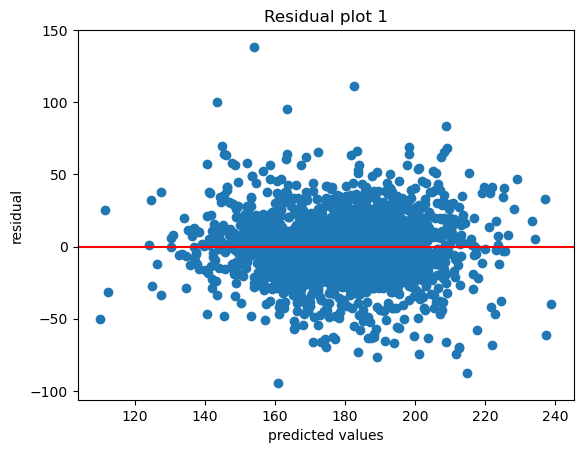

In [21]:
plt.scatter(y1_pred, residuals_1)
plt.xlabel('predicted values')
plt.ylabel('residual')
plt.title('Residual plot 1')
plt.axhline(y=0, color='r', linestyle='-')

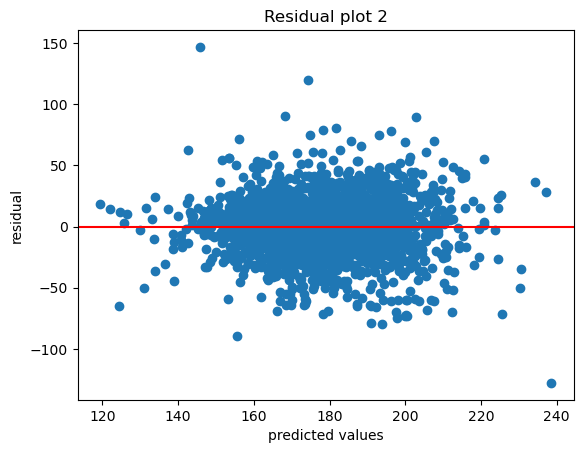

In [22]:
plt.scatter(y2_pred, residuals_2)
plt.xlabel('predicted values')
plt.ylabel('residual')
plt.title('Residual plot 2')
plt.axhline(y=0, color='r', linestyle='-')

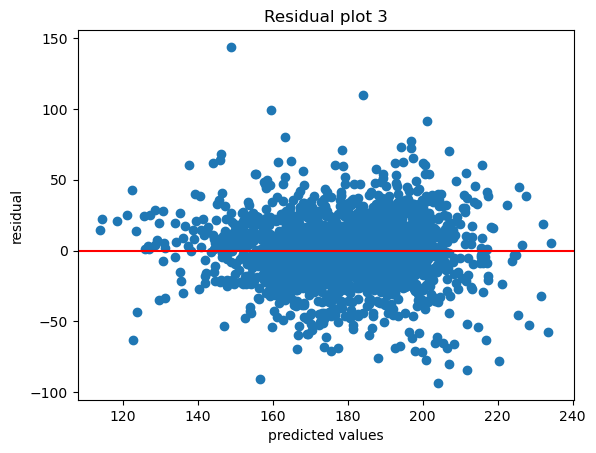

In [23]:
plt.scatter(y3_pred, residuals_3)
plt.xlabel('predicted values')
plt.ylabel('residual')
plt.title('Residual plot 3')
plt.axhline(y=0, color='r', linestyle='-')

3-(5) Do residuals of M1, M2, and M3 follow the normal distribution based on the Jarque–Bera test? (significance level is 0.05). If residuals do not follow the normal distribution, what might be the cause? 

In [26]:
n, p = X1.shape

#Skewness
S = skew(residuals_1)
print("Skewness:",S)

#Kurtosis
C = kurtosis(residuals_1, fisher=False)
print("Kurtosis:",C)

#JB (Test-Statistic)
JB = (n-p)/6 * (S**2 + (C-3)**2/4)
print("JB:",JB)

#Critical Value (chi-squared distribution, df=n-2)
alpha = 0.05
cv = chi2.ppf(q=1-alpha, df=2)
print("cv : ",cv)

#p-value
print("p-value : ", 1-chi2.cdf(JB, df=2))

# this residual follows the normal distribution!
# Because, JB is lower than Critical Value

Skewness: 0.09019713089705159
Kurtosis: 5.5163861365487685
JB: 611.0151626786953
cv :  5.991464547107979
p-value :  0.0


In [27]:
n, p = X2.shape

#Skewness
S = skew(residuals_2)
print("Skewness:",S)

#Kurtosis
C = kurtosis(residuals_2, fisher=False)
print("Kurtosis:",C)

#JB (Test-Statistic)
JB = (n-p)/6 * (S**2 + (C-3)**2/4)
print("JB:",JB)

#Critical Value (chi-squared distribution, df=n-2)
alpha = 0.05
chi2.ppf(q=1-alpha, df=2)

# this residual follows the normal distribution!
# Because, JB is lower than Critical Value

Skewness: -0.055006134279318074
Kurtosis: 5.3537020186013935
JB: 537.1575375124637


5.991464547107979

In [28]:
n, p = X3.shape

#Skewness
S = skew(residuals_3)
print("Skewness:",S)

#Kurtosis
C = kurtosis(residuals_3, fisher=False)
print("Kurtosis:",C)

#JB (Test-Statistic)
JB = (n-p)/6 * (S**2 + (C-3)**2/4)
print("JB:",JB)

#Critical Value (chi-squared distribution, df=n-2)
alpha = 0.05
chi2.ppf(q=1-alpha, df=2)

# this residual follows the normal distribution!
# Because, JB is lower than Critical Value

Skewness: 0.05151474206134811
Kurtosis: 5.439673569333103
JB: 574.399271885274


5.991464547107979

3-(6) Do residuals of M1, M2, and M3 satisfy homoskedasticty based on the Breusch–Pagan test? (significance level is 0.05) 

In [37]:
# Fit an auxiliary regression model and obtain the RSS
X_resid_m1 = np.hstack((X1, residuals_1.values.reshape(-1,1)))
X_resid_m2 = np.hstack((X2, residuals_2.values.reshape(-1,1)))
X_resid_m3 = np.hstack((X3, residuals_3.values.reshape(-1,1)))

rss_m1 = np.sum(residuals_1**2)
rss_m2 = np.sum(residuals_2**2)
rss_m3 = np.sum(residuals_3**2)

# Calculate the Breusch-Pagan test statistic and p-value
n = len(y1)

k_m1 = X_resid_m1.shape[1]
k_m2 = X_resid_m2.shape[1]
k_m3 = X_resid_m3.shape[1]

rsq_m1 = M1.score(X1,y1)
rsq_m2 = M2.score(X2,y2)
rsq_m3 = M3.score(X3,y3)

bp_m1 = n * rsq_m1 / k_m1
bp_m2 = n * rsq_m2 / k_m2
bp_m3 = n * rsq_m3 / k_m3

p_m1 = 1 - f.cdf(bp_m1, k_m1-1, n-k_m1)
p_m2 = 1 - f.cdf(bp_m2, k_m2-1, n-k_m2)
p_m3 = 1 - f.cdf(bp_m3, k_m3-1, n-k_m3)

print("M1 - Breusch-Pagan test statistic: ", bp_m1)
print("M1 - p-value: ", p_m1)

print("M2 - Breusch-Pagan test statistic: ", bp_m2)
print("M2 - p-value: ", p_m2)

print("M3 - Breusch-Pagan test statistic: ", bp_m3)
print("M3 - p-value: ", p_m3)

# p-value가 0.05보다 작기 때문에 heteroskedasticity이다. (모두)

M1 - Breusch-Pagan test statistic:  32.47648798517489
M1 - p-value:  1.1102230246251565e-16
M2 - Breusch-Pagan test statistic:  67.46723866583733
M2 - p-value:  1.1102230246251565e-16
M3 - Breusch-Pagan test statistic:  41.45966324304417
M3 - p-value:  1.1102230246251565e-16


# 2. Logistic regression


Using the MAGIC Gamma Telescope data set, build a classifier through logistic regression.

The included variabes in this dataset are as follows. 'class' variable is a target(dependent) variable.
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)
    - g is treated as class 1 while h is treated as class 0

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

# data partition
trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)
# train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

magic

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


(1) Train logistic regression models using one of the explanatory variables using trnX (train total 10 logistic regression models) and then calculate accuracy of the models using valX. Which variable is the most important according to the accuracy? 

In [16]:
# list of explanatory variables
explanatory_vars = magic.columns[:-1]

# dictionary to store model accuracies
accuracies = {}

# train one model for each explanatory variable
for var in explanatory_vars:
    # select the column corresponding to the current variable
    X_train = trnX[:, magic.columns.get_loc(var)].reshape(-1, 1)
    X_val = valX[:, magic.columns.get_loc(var)].reshape(-1, 1)
    
    # create and fit logistic regression model
    lr = LogisticRegression()
    lr.fit(X_train, trnY)
    
    # calculate accuracy on validation set
    accuracy = lr.score(X_val, valY)
    accuracies[var] = accuracy

# print the most important variable according to accuracy
most_important = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)[0]
print(f'The most important variable is {most_important[0]} with an accuracy of {most_important[1]:.3f}')

The most important variable is fAlpha with an accuracy of 0.736


(2) Using the top two variables with the highest accuracy obtained for Question (1), train a logistic regression model on trnX. Draw the decision boundary showing equal probability values for classes 0 and 1 (x-axis=the variable with the highest accuracy, y-axis = the variable with the second highest accuracy) with scatter plots of the samples used for the training (assign different colors depending on the predicted class for the scatter plot). 

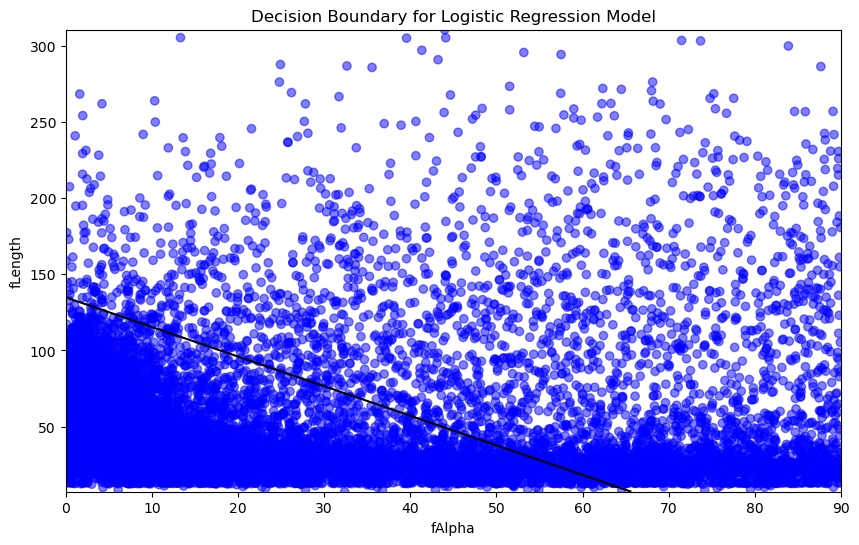

In [17]:
# List of explanatory variables sorted by accuracy
explanatory_vars_sorted = [var for var, acc in sorted(accuracies.items(), key=lambda x: x[1], reverse=True)]

# Select the top two variables
top_vars = explanatory_vars_sorted[:2]

# Select columns corresponding to the top two variables
X_train = trnX[:, [magic.columns.get_loc(top_vars[0]), magic.columns.get_loc(top_vars[1])]]
y_train = trnY

# Create and fit logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Set up the plot
plt.figure(figsize=(10, 6))
plt.xlabel(top_vars[0])
plt.ylabel(top_vars[1])
plt.title('Decision Boundary for Logistic Regression Model')

# Create a meshgrid for the two variables
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))

# Predict the probability for each point on the meshgrid
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary at 0.5 probability
plt.contour(xx, yy, Z, levels=[0.5], colors='black')

# Plot the scatter plot of training samples with different colors depending on the predicted class
colors = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, cmap='coolwarm', alpha=0.5)

# Show the plot
plt.show()

(3) Using MAGIC Gamma Telescope data set, calculate accuracy with varying cutoff for the final decision (if the probability of 1 >= cutoff, the predicted target is 1). cutoff ∈{0.1,0.15,0.2,0.25,…,0.95}. Draw a line plot (x=cutoff, y=accuracy). For this problem, the model is trained using trnX including all explanatory variables and accuracy is calculated using valX. 

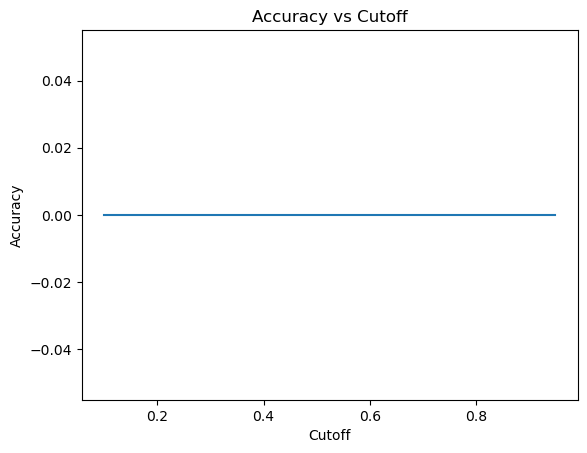

In [18]:
# train a logistic regression model using all explanatory variables
lr = LogisticRegression(max_iter=5000)

# fit the model to the training data
lr.fit(trnX, trnY)

# calculate predicted probabilities on validation set
probs = lr.predict_proba(valX)[:,1]

# calculate accuracy for different cutoffs
cutoffs = np.arange(0.1, 1.0, 0.05)
accuracies = []
for cutoff in cutoffs:
    preds = np.where(probs >= cutoff, 1, 0)
    acc = np.mean(preds == valY)
    accuracies.append(acc)

# plot the results
plt.plot(cutoffs, accuracies)
plt.title('Accuracy vs Cutoff')
plt.xlabel('Cutoff')
plt.ylabel('Accuracy')
plt.show()